# Workshop Collaboration
*Variable exploration phase* - This notebooks load the processed dataset and focusses on the top 2 corrrelated columns.

#### Notebook Imports & Load the processed data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

# -- Load your reduced dataset
df = pd.read_csv("data/processed/correlation_jngdc_processed.csv")

# -- Display basic overview
print("\n--- Shape (rows, columns) ---")
print(df.shape)

print("\n--- Info ---")
df.info()

print("\n--- Summary Statistics ---")
df.describe()


--- Shape (rows, columns) ---
(500, 6)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  500 non-null    float64
 1   99      500 non-null    float64
 2   92      500 non-null    float64
 3   51      500 non-null    float64
 4   58      500 non-null    float64
 5   41      500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB

--- Summary Statistics ---


,target,99,92,51,58,41
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.882341,0.020704,-0.004135,0.045543,-0.059810,-0.011185
std,160.922949,0.695623,1.011696,1.000935,0.940031,0.962017
min,-485.914105,-2.091394,-2.769261,-2.964858,-2.856679,-2.887508
25%,-108.942259,-0.449730,-0.700792,-0.589177,-0.640880,-0.615012
50%,-9.114029,-0.014053,0.013844,-0.035479,-0.016138,0.000424
75%,117.389754,0.495964,0.659937,0.756847,0.581771,0.598629
max,456.485770,2.145987,2.780089,3.275693,2.523561,2.651799


#### Focus on 2 features

In [20]:
# --- Focus on your 2 features ---
my_features= ['99', '92']

# --- Summary statistics ---
print(df[my_features + ['target']].describe())

               99          92      target
count  500.000000  500.000000  500.000000
mean     0.020704   -0.004135   -0.882341
std      0.695623    1.011696  160.922949
min     -2.091394   -2.769261 -485.914105
25%     -0.449730   -0.700792 -108.942259
50%     -0.014053    0.013844   -9.114029
75%      0.495964    0.659937  117.389754
max      2.145987    2.780089  456.485770


#### Explore each variable individually

Correlation between 99 and target: 0.777


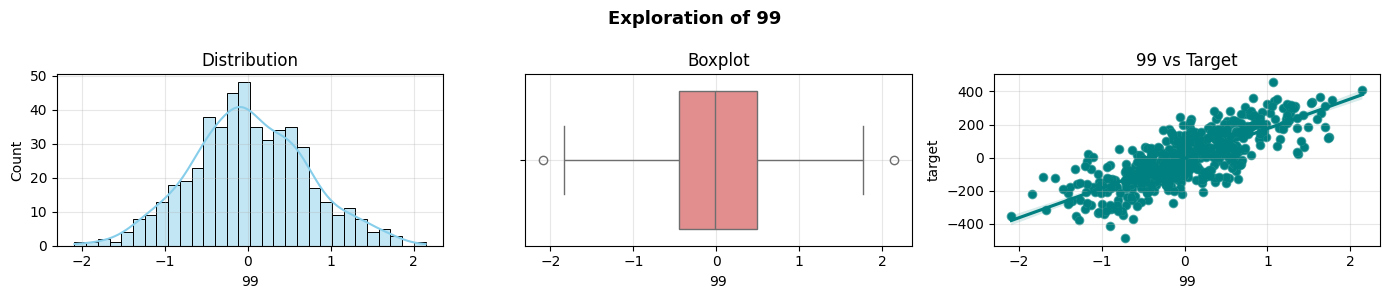

Correlation between 92 and target: 0.583


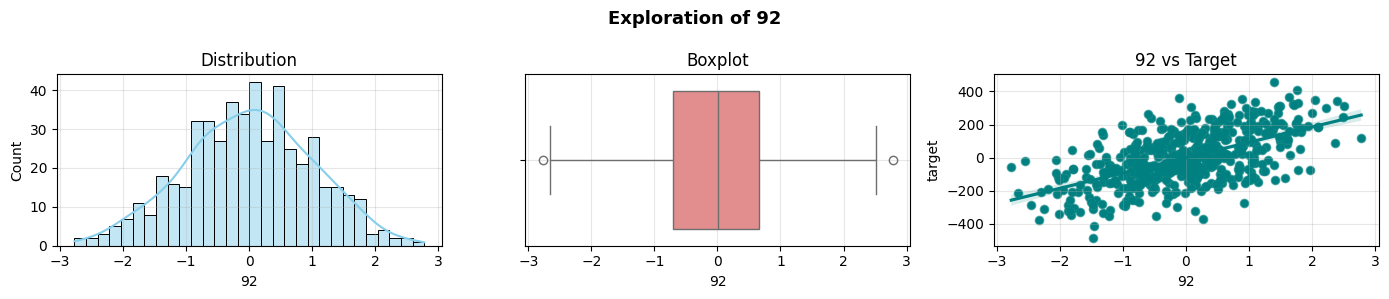

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Focus on your 2 features ---
my_features = ['99', '92']

# --- Loop through each variable and plot all 3 visualizations ---
for col in my_features:
    fig, axes = plt.subplots(1, 3, figsize=(14, 3))
    fig.suptitle(f"Exploration of {col}", fontsize=13, fontweight='bold')

    # --- Histogram ---
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title("Distribution")
    axes[0].set_xlabel(col)
    axes[0].grid(alpha=0.3)

    # --- Boxplot ---
    sns.boxplot(x=df[col], ax=axes[1], color="lightcoral")
    axes[1].set_title("Boxplot")
    axes[1].set_xlabel(col)
    axes[1].grid(alpha=0.3)

    # --- Scatterplot vs Target ---
    sns.scatterplot(data=df, x=col, y='target', ax=axes[2], color="teal")
    sns.regplot(data=df, x=col, y='target', ax=axes[2],
            color="teal", scatter_kws={'alpha':0.6})
    axes[2].set_title(f"{col} vs Target")
    axes[2].grid(alpha=0.3)

    # --- Correlation value ---
    corr = df[[col, 'target']].corr().iloc[0, 1]
    print(f"Correlation between {col} and target: {corr:.3f}")

    plt.tight_layout()
    plt.show()


#### Outlier Detection

In [31]:
# --- Outlier detection using IQR ---
print("\n--- Outlier Detection Summary ---")

for col in my_features:
    if df[col].dtype != 'O':  # Only for numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Boolean mask for outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]

        print(f"{col:<15} | IQR = {IQR:.2f} | Outliers = {num_outliers}")
        print(f"   Range considered normal: {lower_bound:.2f} to {upper_bound:.2f}")



--- Outlier Detection Summary ---
99              | IQR = 0.95 | Outliers = 2
   Range considered normal: -1.87 to 1.91
92              | IQR = 1.36 | Outliers = 2
   Range considered normal: -2.74 to 2.70


#### Deeper descriptive statistics

In [33]:
for col in my_features:
    print(f"\n--- {col} detailed stats ---")
    # print(df[col].describe())
    print(f"Median: {df[col].median()}")
    print(f"Skewness: {df[col].skew():.3f}")
    print(f"Kurtosis: {df[col].kurt():.3f}")



--- 99 detailed stats ---
Median: -0.0140530302085265
Skewness: 0.103
Kurtosis: -0.028

--- 92 detailed stats ---
Median: 0.013843726508688401
Skewness: -0.052
Kurtosis: -0.268


#### Visualize relationships
**Pairplot** Shows scatterplots between variables and the target together.
**Heatmap of correlations** Just my features

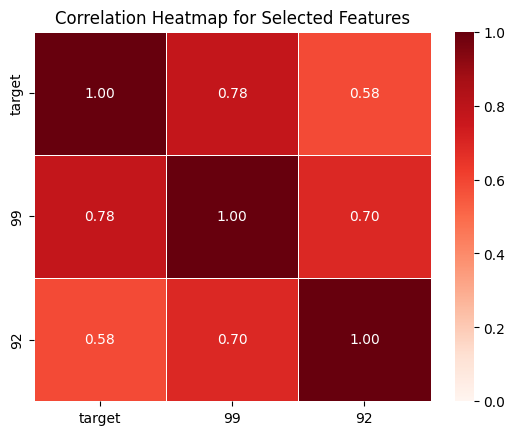

In [40]:
# --- Heaptmap of correlations ---
corr = df[['target'] + my_features].corr()

sns.heatmap(corr, annot=True, cmap="Reds",       # only red shades 
    fmt=".2f", linewidths=0.5, vmin=0, vmax=1)     # keep scale 0→1 for clarity
plt.title("Correlation Heatmap for Selected Features")
plt.show()

In [42]:
# # --- Pairplot ---
# import seaborn as sns
# sns.pairplot(df[['target'] + my_features], corner=True)

## **Summary**
**Variable 99**
- Median close to zero, slightly right-skewed (skew = +0.10).
- Distribution approximately symmetric and normal (kurtosis ≈ 0).
- No extreme outliers; variable appears well-behaved.

**Variable 92**

- Median close to zero, slightly left-skewed (skew = –0.05).
- Mildly flatter than normal (kurtosis = –0.27).
- Also appears symmetric and clean; no major outliers visible.


#### EXTRA: different ways for visualisation

Correlation between 99 and target: 0.777


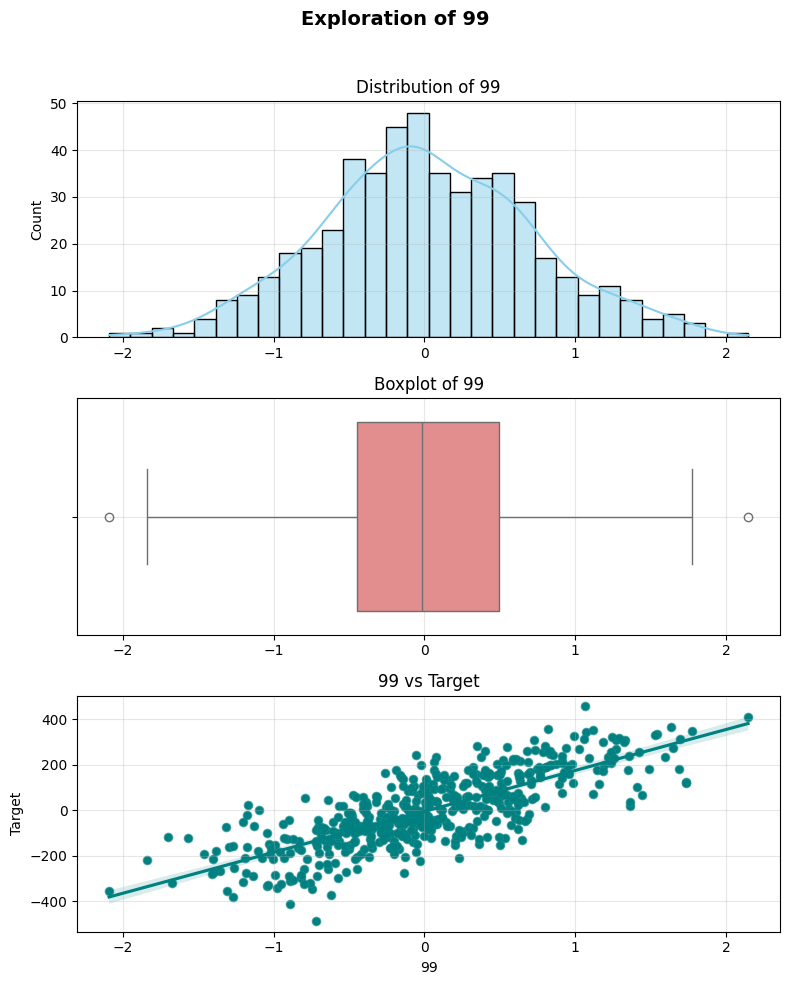

Correlation between 92 and target: 0.583


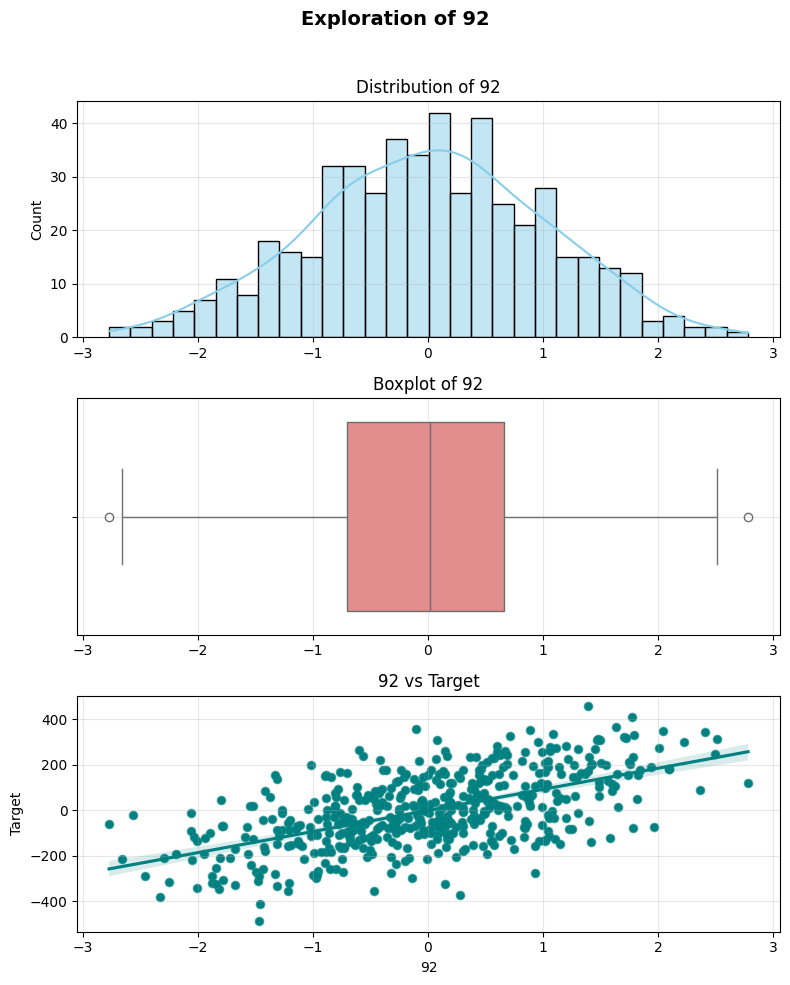

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Focus on your 2 features ---
my_features = ['99', '92']

# --- Loop through each variable and plot all 3 visualizations vertically ---
for col in my_features:
    fig, axes = plt.subplots(3, 1, figsize=(8, 10))  # 3 rows, 1 column
    fig.suptitle(f"Exploration of {col}", fontsize=14, fontweight='bold')

    # --- Histogram ---
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel("")
    axes[0].grid(alpha=0.3)

    # --- Boxplot ---
    sns.boxplot(x=df[col], ax=axes[1], color="lightcoral")
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel("")
    axes[1].grid(alpha=0.3)

    # --- Scatterplot vs Target ---
    sns.scatterplot(data=df, x=col, y='target', ax=axes[2], color="teal")
    sns.regplot(data=df, x=col, y='target', ax=axes[2],
            color="teal", scatter_kws={'alpha':0.6})
    axes[2].set_title(f"{col} vs Target")
    axes[2].set_xlabel(col)
    axes[2].set_ylabel("Target")
    axes[2].grid(alpha=0.3)

    # --- Correlation value ---
    corr = df[[col, 'target']].corr().iloc[0, 1]
    print(f"Correlation between {col} and target: {corr:.3f}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for title
    plt.show()


Correlation between 99 and target: 0.777
Correlation between 92 and target: 0.583


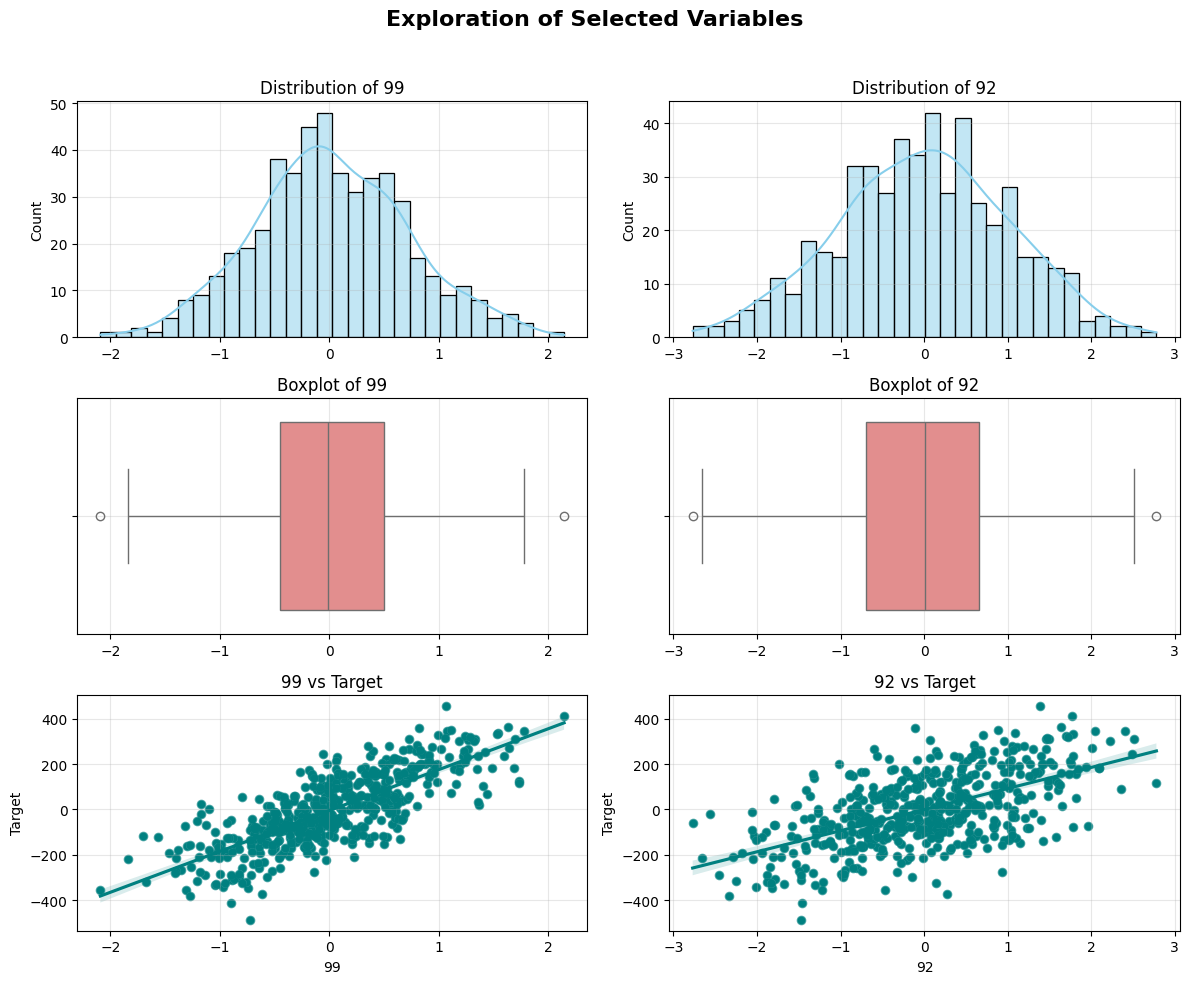

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Your two selected features ---
my_features = ['99', '92']

# --- Create a 3x2 grid (3 rows = hist, box, scatter, 2 columns) ---
fig, axes = plt.subplots(3, len(my_features), figsize=(12, 10))
fig.suptitle("Exploration of Selected Variables", fontsize=16, fontweight='bold')

for i, col in enumerate(my_features):
    # --- Row 1: Histogram ---
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0, i], color="skyblue")
    axes[0, i].set_title(f"Distribution of {col}")
    axes[0, i].set_xlabel("")
    axes[0, i].grid(alpha=0.3)

    # --- Row 2: Boxplot ---
    sns.boxplot(x=df[col], ax=axes[1, i], color="lightcoral")
    axes[1, i].set_title(f"Boxplot of {col}")
    axes[1, i].set_xlabel("")
    axes[1, i].grid(alpha=0.3)

    # --- Row 3: Scatterplot vs Target ---
    sns.scatterplot(data=df, x=col, y='target', ax=axes[2, i], color="teal")
    sns.regplot(data=df, x=col, y='target', ax=axes[2, i],
            color="teal", scatter_kws={'alpha':0.6})

    axes[2, i].set_title(f"{col} vs Target")
    axes[2, i].set_xlabel(col)
    axes[2, i].set_ylabel("Target")
    axes[2, i].grid(alpha=0.3)

    # --- Correlation value ---
    corr = df[[col, 'target']].corr().iloc[0, 1]
    print(f"Correlation between {col} and target: {corr:.3f}")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
